In [1]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import utils as ut

image = cv2.imread('TC/03.png')
print(image.shape)

(1012, 1012, 3)


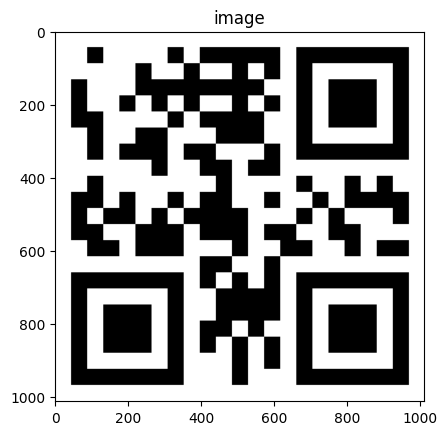

Failed.
Potential Boxes Found : 7


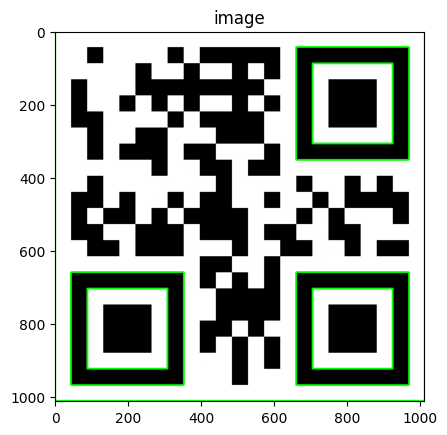

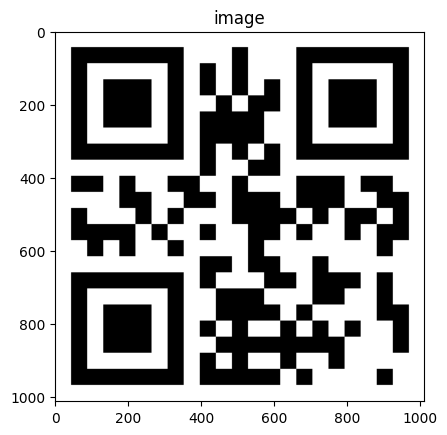

In [2]:
grayImg = ut.loadImage('TC/03.png')
ut.showImage(grayImg)

contours= ut.locatorContours(grayImg)

contourImg = ut.drawContours(image, contours)
ut.showImage(contourImg)
fixFlippedQr =  ut.fixFlippedFixedQr(grayImg, contours)
ut.showImage(fixFlippedQr)






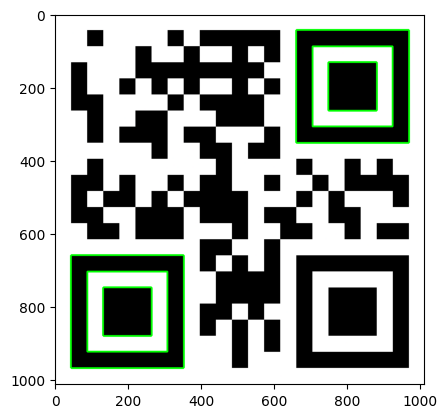

In [3]:
image= cv2.imread('TC/03.png')
imgray=ut.loadImage('TC/03.png')
contours,heirarchy = cv2.findContours(imgray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
def ContoursFound(contours):
    img_width  = 1012
    img_height = 1012
    potential_boxes = ([])
    for contour in contours:
        x,y,w,h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h
        if abs(aspect_ratio - 1) > 0.2: # Aspect ratio should be close to 1 if it is a square-like or rectangular shape
            continue # Not what we are looking for.
        min_size = min(w, h)
        if min_size < 0.1 * img_width:  # Img_width [Should] be the same for all images.          
            continue                    
                                        # If the Rectangle is TOO small -> It is not the locator box.
                                        # Probably doesn't need to be a % of the image. ( Could just use some number )

        center_x, center_y = (x + x + w) // 2, (y + y + h) // 2
        image_center_x, image_center_y = img_width // 2, img_height // 2

        # Check for top-left, top-right, or bottom-left corner based on relative position
        is_top_left = center_x < image_center_x * 0.4 and center_y < image_center_y * 0.4
        is_top_right = center_x > image_center_x * 1.6 and center_y < image_center_y * 0.4
        is_bottom_left = center_x < image_center_x * 0.4 and center_y > image_center_y * 1.6


        if not (is_top_left or is_top_right or is_bottom_left): # Wrong Place.
            continue

        # Potential locator box based on heuristics
        potential_boxes.append(contour)
    return potential_boxes

test = ContoursFound(contours)
# Draw the Result Boxes
for i in range(len(test)):
    cv2.drawContours(image,test,i,(0,255,0),4)
    i = i + 1
plt.imshow(image)
